In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import os
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import preprocessing

In [6]:
df = pd.read_excel('ded_df.xlsx', dtype = {'sleep_quality': str, 'stress_level': str}).iloc[:,1:]

# Logit model

In [7]:
# Drop first category of categorical variables
df_dummify = pd.get_dummies(df, drop_first = True)

In [8]:
# Split df_dummify into X and y
X, y = df_dummify.iloc[:,:-1], df_dummify.loc[:,'dry_eye_disease_Y']

In [9]:
# Split X and y into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 30) 

In [55]:
# fit scaler 
scaler = preprocessing.StandardScaler().fit(X_train)

# scale train X
X_train_scaled = scaler.transform(X_train)

# scale test X
X_test_scaled = scaler.transform(X_test)

# Fit Logit model
Logit_model = LogisticRegression().fit(X_train_scaled, y_train)

# predict test set samples 
yhat = Logit_model.predict(X_test_scaled)

array([[ 1.0615885 ,  1.39130639, -1.09883207, ..., -0.99925028,
         1.01055571, -0.99551008],
       [-0.29572459, -0.2800753 , -0.59184211, ..., -0.99925028,
         1.01055571,  1.00451017],
       [-1.03607718,  1.27603869,  1.26712104, ...,  1.00075028,
         1.01055571,  1.00451017],
       ...,
       [-1.65303767, -0.79877997, -0.67634044, ...,  1.00075028,
        -0.98955455,  1.00451017],
       [-1.28286138,  0.75733403, -0.25384881, ..., -0.99925028,
         1.01055571,  1.00451017],
       [ 1.30837269,  0.69970017,  1.09812439, ..., -0.99925028,
         1.01055571, -0.99551008]])

In [78]:
# Cross validate model 
cv_logit = cross_validate(Logit_model, X_test_scaled, y_test, cv = 3,
              scoring = ('accuracy', 'recall', 'f1'))
cv_logit

{'fit_time': array([0.01304722, 0.01132202, 0.01085353]),
 'score_time': array([0.01207995, 0.01294446, 0.01129365]),
 'test_accuracy': array([0.67241379, 0.67366842, 0.67516879]),
 'test_recall': array([0.93901036, 0.93901036, 0.9516129 ]),
 'test_f1': array([0.78878685, 0.78955007, 0.79232614])}

In [80]:
# cross validate test set with metrics accuracy, recall and f1
accuracy_score = np.mean(cv_logit['test_accuracy'])
recall_score = np.mean(cv_logit['test_recall'])
f1_score = np.mean(cv_logit['test_f1'])
print("accuracy is {}".format(accuracy_score))
print("recall is {}".format(recall_score))
print("f1 score is {}".format(f1_score))

accuracy is 0.6737503341352579
recall is 0.9432112055631859
f1 score is 0.7902210217367035


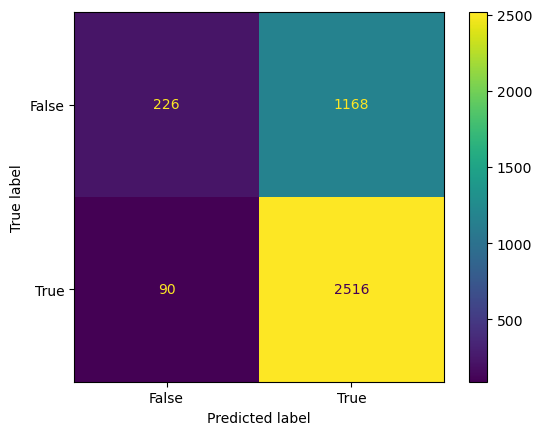

In [88]:
cm = confusion_matrix(y_test, yhat, labels=Logit_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Logit_model.classes_
                              )
disp.plot()
#plt.show()
plt.savefig('CM_logit_model.png')

# Logit model (Grid Search)

In [133]:
# 20 C values to test model on
C_grid = np.linspace(0.01,5,50)

parameters = {'C': C_grid}
parameters

# logit model
Logit_Grid = LogisticRegression()

# Grid search object 
GS_CV = GridSearchCV(Logit_Grid, parameters).fit(X_train_scaled, y_train)

In [135]:
GS_CV.best_estimator_

LogisticRegression(C=2.555918367346939)

In [137]:
yhat_grid = GS_CV.best_estimator_.predict(X_test_scaled)

In [139]:
cv_logit_grid = cross_validate(GS_CV.best_estimator_, X_test_scaled, y_test, cv = 3,
              scoring = ('accuracy', 'recall', 'f1'))
cv_logit_grid

{'fit_time': array([0.14186525, 0.04463482, 0.06070447]),
 'score_time': array([0.0647645 , 0.01757288, 0.01678038]),
 'test_accuracy': array([0.67241379, 0.67291823, 0.67516879]),
 'test_recall': array([0.93901036, 0.93785961, 0.9516129 ]),
 'test_f1': array([0.78878685, 0.78896418, 0.79232614])}

In [141]:
# cross validate test set with metrics accuracy, recall and f1
accuracy_score = np.mean(cv_logit_grid['test_accuracy'])
recall_score = np.mean(cv_logit_grid['test_recall'])
f1_score = np.mean(cv_logit_grid['test_f1'])
print("accuracy is {}".format(accuracy_score))
print("recall is {}".format(recall_score))
print("f1 score is {}".format(f1_score))

accuracy is 0.6735002716196291
recall is 0.9428276229011224
f1 score is 0.7900257248784538


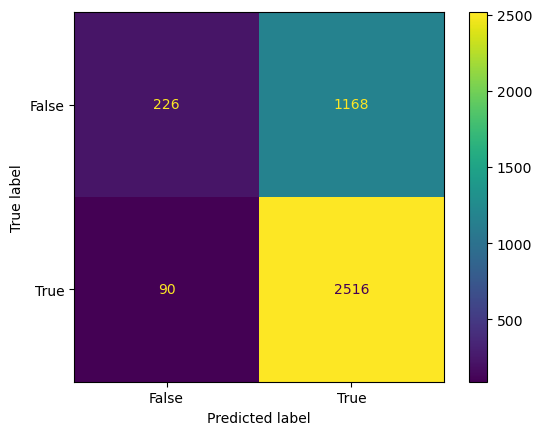

In [145]:
cm = confusion_matrix(y_test, yhat_grid, labels = GS_CV.best_estimator_.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = GS_CV.best_estimator_.classes_
                              )
disp.plot()
#plt.savefig('CM_logit_grid_model.png')
plt.show()